In [1]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#https://data-wvdot.opendata.arcgis.com/datasets/wv-county-boundaries/api
base_url = 'https://services2.arcgis.com/xLpB90lOmCXYDAWo/arcgis/rest/services/WV_Counties/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json'

response = requests.get(base_url)
response

<Response [200]>

In [3]:
url = f'https://services2.arcgis.com/xLpB90lOmCXYDAWo/arcgis/rest/services/WV_Counties/FeatureServer/0/query?where=1%3D1&outFields=FIPS,Districts,CO_CODE,Shape_Leng,Shape__Area,Shape__Length,AREA_,STATE&outSR=4326&f=json'

response = requests.get(url)

In [4]:
res = response.json()

In [5]:
#working on normalizing the dictionary...noticed several nested dictionarys. 
normalindi = pd.json_normalize(res)
normalindi

,objectIdFieldName,globalIdFieldName,geometryType,fields,features,uniqueIdField.name,uniqueIdField.isSystemMaintained,geometryProperties.shapeAreaFieldName,geometryProperties.shapeLengthFieldName,geometryProperties.units,spatialReference.wkid,spatialReference.latestWkid
0,OBJECTID,,esriGeometryPolygon,"[{'name': 'FIPS', 'type': 'esriFieldTypeIntege...","[{'attributes': {'FIPS': 54069, 'Districts': 6...",OBJECTID,True,Shape__Area,Shape__Length,esriMeters,4326,4326


In [6]:
#normalized fields
normalfields = pd.json_normalize(normalindi.fields)
normalfields

,0,1,2,3,4,5,6,7
0,"{'name': 'FIPS', 'type': 'esriFieldTypeInteger...","{'name': 'Districts', 'type': 'esriFieldTypeIn...","{'name': 'CO_CODE', 'type': 'esriFieldTypeStri...","{'name': 'Shape_Leng', 'type': 'esriFieldTypeD...","{'name': 'Shape__Area', 'type': 'esriFieldType...","{'name': 'Shape__Length', 'type': 'esriFieldTy...","{'name': 'AREA_', 'type': 'esriFieldTypeDouble...","{'name': 'STATE', 'type': 'esriFieldTypeIntege..."


In [7]:
#converted to a list
dictionaries = normalfields.iloc[0].tolist()

In [8]:
#converted list of dictionaries to a dataframe
df_fields_clean = pd.DataFrame(dictionaries)

In [9]:
df_fields_clean 

,name,type,alias,sqlType,domain,defaultValue,length
0,FIPS,esriFieldTypeInteger,FIPS,sqlTypeOther,None,None,NaN
1,Districts,esriFieldTypeInteger,Districts,sqlTypeOther,None,None,NaN
2,CO_CODE,esriFieldTypeString,CO_CODE,sqlTypeOther,None,None,2.0
3,Shape_Leng,esriFieldTypeDouble,Shape_Leng,sqlTypeOther,None,None,NaN
4,Shape__Area,esriFieldTypeDouble,Shape__Area,sqlTypeDouble,None,None,NaN
5,Shape__Length,esriFieldTypeDouble,Shape__Length,sqlTypeDouble,None,None,NaN
6,AREA_,esriFieldTypeDouble,AREA_,sqlTypeOther,None,None,NaN
7,STATE,esriFieldTypeInteger,STATE,sqlTypeOther,None,None,NaN


In [10]:
#normalized features
normalfeatures = pd.json_normalize(normalindi.features)
normalfeatures

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,"{'attributes.FIPS': 54069, 'attributes.Distric...","{'attributes.FIPS': 54051, 'attributes.Distric...","{'attributes.FIPS': 54077, 'attributes.Distric...","{'attributes.FIPS': 54065, 'attributes.Distric...","{'attributes.FIPS': 54061, 'attributes.Distric...","{'attributes.FIPS': 54103, 'attributes.Distric...","{'attributes.FIPS': 54057, 'attributes.Distric...","{'attributes.FIPS': 54003, 'attributes.Distric...","{'attributes.FIPS': 54049, 'attributes.Distric...","{'attributes.FIPS': 54095, 'attributes.Distric...",...,"{'attributes.FIPS': 54045, 'attributes.Distric...","{'attributes.FIPS': 54081, 'attributes.Distric...","{'attributes.FIPS': 54059, 'attributes.Distric...","{'attributes.FIPS': 54089, 'attributes.Distric...","{'attributes.FIPS': 54109, 'attributes.Distric...","{'attributes.FIPS': 54063, 'attributes.Distric...","{'attributes.FIPS': 54055, 'attributes.Distric...","{'attributes.FIPS': 54047, 'attributes.Distric...","{'attributes.FIPS': 54029, 'attributes.Distric...","{'attributes.FIPS': 54009, 'attributes.Distric..."


In [11]:
dicts = normalfeatures.iloc[0].tolist()

In [12]:
df_features_clean = pd.DataFrame(dicts)
df_features_clean.head()

,attributes.FIPS,attributes.Districts,attributes.CO_CODE,attributes.Shape_Leng,attributes.Shape__Area,attributes.Shape__Length,attributes.AREA_,attributes.STATE,geometry.rings
0,54069,6,35,69540.761745,2.819454e+08,69540.761745,0,54,"[[[-80.5191075263139, 40.1596802151991], [-80...."
1,54051,6,26,125168.256768,8.071761e+08,125168.256768,0,54,"[[[-80.5191239433997, 40.0164184796756], [-80...."
2,54077,4,39,179371.523638,1.686140e+09,179371.523638,0,54,"[[[-79.4868763090616, 39.2059688874129], [-79...."
3,54065,5,33,145623.760076,5.954377e+08,145623.760076,0,54,"[[[-78.0220927972938, 39.6196773149698], [-78...."
4,54061,4,31,164159.423172,9.470705e+08,164159.423172,0,54,"[[[-79.8945064849374, 39.4355232837161], [-79...."


In [13]:
#in order to merge my json dataset and my saipe data, the fips code need to match
#so i'll have to insure that attributes.fips number is three digits (001,002,etc)
#have to drop the 54
df_features_clean['attributes.FIPS'] = df_features_clean['attributes.FIPS'].astype(str).str[2:]
df_features_clean.head()

,attributes.FIPS,attributes.Districts,attributes.CO_CODE,attributes.Shape_Leng,attributes.Shape__Area,attributes.Shape__Length,attributes.AREA_,attributes.STATE,geometry.rings
0,069,6,35,69540.761745,2.819454e+08,69540.761745,0,54,"[[[-80.5191075263139, 40.1596802151991], [-80...."
1,051,6,26,125168.256768,8.071761e+08,125168.256768,0,54,"[[[-80.5191239433997, 40.0164184796756], [-80...."
2,077,4,39,179371.523638,1.686140e+09,179371.523638,0,54,"[[[-79.4868763090616, 39.2059688874129], [-79...."
3,065,5,33,145623.760076,5.954377e+08,145623.760076,0,54,"[[[-78.0220927972938, 39.6196773149698], [-78...."
4,061,4,31,164159.423172,9.470705e+08,164159.423172,0,54,"[[[-79.8945064849374, 39.4355232837161], [-79...."


In [14]:
import geopandas as gpd
from shapely.geometry import Point

C:\Users\user\anaconda3\envs\geospatial\Lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [15]:
from shapely import wkt

In [16]:
#df_features_clean['geometry.rings'] = df_features_clean['geometry.rings'].apply(wkt.loads)
#TypeError: Expected bytes or string, got float

In [17]:
normalized_coords = []

for idx, row in df_features_clean.iterrows():
    fips = row["attributes.FIPS"]
    rings = row["geometry.rings"]
    
    for ring in rings:
        for coord in ring:
            lon, lat = coord
            normalized_coords.append({"FIPS": fips, "lon": lon, "lat": lat})

In [18]:
geo_df = pd.DataFrame(normalized_coords)
geo_df

,FIPS,lon,lat
0,069,-80.519108,40.159680
1,069,-80.519095,40.155917
2,069,-80.519076,40.150416
3,069,-80.519049,40.147090
4,069,-80.519028,40.144496
...,...,...,...
157603,009,-80.518899,40.172688
157604,009,-80.519059,40.172752
157605,009,-80.519139,40.172320
157606,009,-80.519141,40.171898


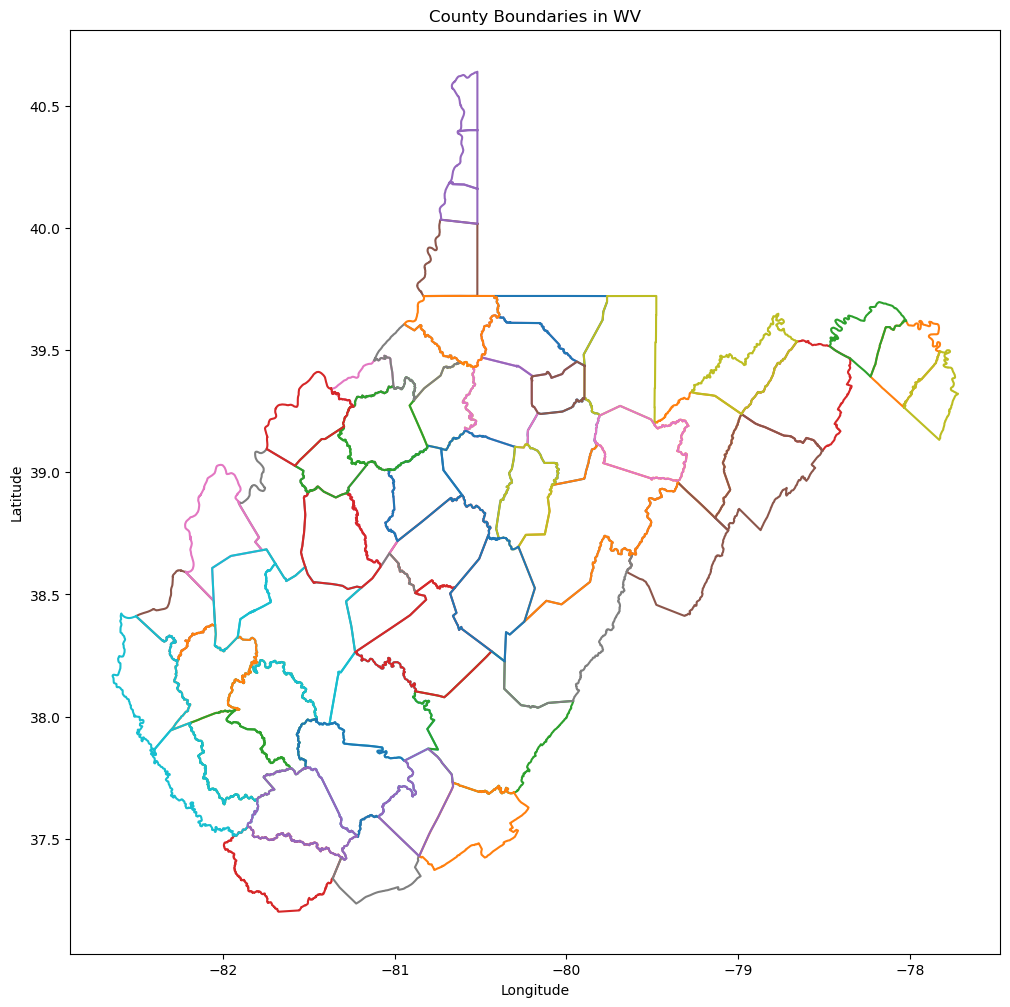

In [19]:
#want to see if my data works
fig, ax = plt.subplots(figsize=(12, 12))
for fips, group in geo_df.groupby("FIPS"):
    ax.plot(group["lon"], group["lat"], label=f"FIPS {fips}")
    ax.set_title("County Boundaries in WV")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(False)
plt.show()

In [20]:
from shapely.geometry import Polygon

In [21]:
# Exporting data for geojson work
polygons = (
    geo_df.groupby("FIPS")[["lon", "lat"]]
    .apply(lambda g: Polygon(g.values))
    .reset_index(name="geometry")
)
polygons.head()

,FIPS,geometry
0,001,"POLYGON ((-79.895497681733 39.2995091034651, -..."
1,003,"POLYGON ((-77.8250559807681 39.4934293678579, ..."
2,005,"POLYGON ((-81.4565975546615 37.9873085266908, ..."
3,007,"POLYGON ((-80.6058027513474 38.9041748965333, ..."
4,009,"POLYGON ((-80.5191075263139 40.1596802151991, ..."


In [22]:
import geopandas as gpd

In [23]:
g_df = gpd.GeoDataFrame(polygons, geometry = 'geometry')  

In [24]:
g_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FIPS      55 non-null     object  
 1   geometry  55 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1012.0+ bytes
